### Package Updates

### Grid Search Validation

In [4]:
include("Julia_Implementation.jl")
using Random
using Distributions
using LinearAlgebra
using Statistics
using StatsFuns: logsumexp
using .Threads
using ProgressMeter
using SpecialFunctions
using Plots
using DataFrames
#Generating the noisy observations

# 参数初始化
beta_pcn = 1.0 # 预条件Crank-Nicolson算法的步长参数
n_iter = 300 # 迭代次数
theta0 = -1.0 # theta的初始猜测
beta0 = 5.0 # beta的初始猜测
C0 = 2.0 # C的初始猜测
num_particles = 3000

# 三个参数的步长
l_theta = 1.0
l_beta = 0.1
l_C = 2.0

# 真实参数值
true_theta = -1.0
kw = 1.0
kv = 0.001
true_sigmaw2 = 2.0
true_sigmaw = sqrt(true_sigmaw2)
true_muw = 5.0
sigma_n = true_sigmaw * sqrt(kv)

# 模拟参数
true_beta = 5.0
true_C = 2.0
T = 30.0
N = 10*round(Int,T) # 分辨率

# 定义Langevin动力学
A = zeros(2, 2)
A[1, 2] = 1.0
A[2, 2] = true_theta
h = [0.0 ; 1.0]
# 模拟
evaluation_points = range(0, T, length=N)
#print("Hi")

subordinator_jumps, jump_times = Julia_Implementation.vectorized_particle_Gamma_generator(true_beta, true_C, T, 1, 1, 1000)# subordinator jump sizes and times
SDE_samples = Julia_Implementation.generate_SDE_samples(subordinator_jumps[1,:],jump_times[1,:],true_muw,true_sigmaw,A,h,evaluation_points)
#print(size(samples))
Noisy_samples = SDE_samples[1, :] .+ randn(length(SDE_samples[1, :])) .* sigma_n


beta_values = LinRange(0.1,10.0,30) # 可以根据需要调整这个范围
log_marginals = similar(beta_values)
alphaw_prior = 0.001
betaw_prior = 0.001
#Pre-heating
Julia_Implementation.Normal_Gamma_Langevin_MPF(Noisy_samples,N,T,2,true_theta,true_beta,true_C,kw,alphaw_prior,betaw_prior,kv)

for i in 1:length(beta_values)
    beta = beta_values[i]
    #Serious Run
    inferred_Xs, inferred_covs, sigmaw2_means, sigmaw2_uncertaintys, accumulated_Es, accumulated_Fs, accumulated_log_marginals = Julia_Implementation.Normal_Gamma_Langevin_MPF(Noisy_samples,N,T,num_particles,true_theta,beta,true_C,kw,alphaw_prior,betaw_prior,kv)
    log_marginal = logsumexp(accumulated_log_marginals) - log(num_particles)
    log_marginals[i] = log_marginal

end
p = plot(beta_values, log_marginals, title="Log Marginals", xlabel="beta", ylabel="Probability", legend=false)
plot(p)


Progress: 100%|█████████████████████████████████████████| Time: 0:00:13
Progress: 100%|█████████████████████████████████████████| Time: 0:00:06
Progress: 100%|█████████████████████████████████████████| Time: 0:00:07
Progress: 100%|█████████████████████████████████████████| Time: 0:00:12
Progress: 100%|█████████████████████████████████████████| Time: 0:00:12
Progress: 100%|█████████████████████████████████████████| Time: 0:00:03
Progress: 100%|█████████████████████████████████████████| Time: 0:00:03
Progress: 100%|█████████████████████████████████████████| Time: 0:00:07
Progress: 100%|█████████████████████████████████████████| Time: 0:00:11
Progress: 100%|█████████████████████████████████████████| Time: 0:00:05
Progress: 100%|█████████████████████████████████████████| Time: 0:00:03
Progress: 100%|█████████████████████████████████████████| Time: 0:00:10
Progress: 100%|█████████████████████████████████████████| Time: 0:00:04
Progress: 100%|█████████████████████████████████████████| Time: 

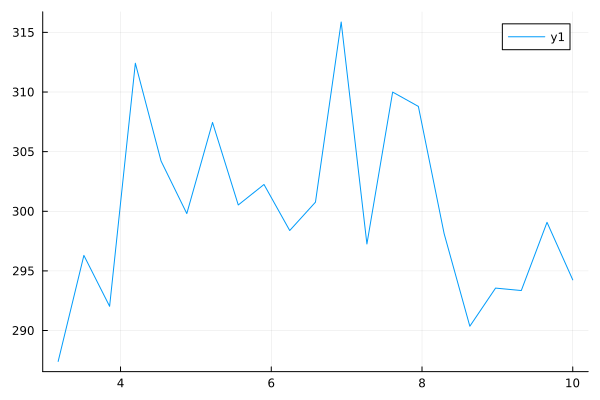

In [2]:
plot(beta_values[10:30],log_marginals[10:30])

In [ ]:
include("Julia_Implementation.jl")
using Random
using Distributions
using LinearAlgebra
using Statistics
using StatsFuns: logsumexp
using .Threads
using ProgressMeter
using SpecialFunctions
using Plots
using DataFrames
#Generating the noisy observations

# 参数初始化
beta_pcn = 1.0 # 预条件Crank-Nicolson算法的步长参数
n_iter = 300 # 迭代次数
theta0 = -1.0 # theta的初始猜测
beta0 = 5.0 # beta的初始猜测
C0 = 2.0 # C的初始猜测
num_particles = 3000

# 三个参数的步长
l_theta = 1.0
l_beta = 0.1
l_C = 2.0

# 真实参数值
true_theta = -1.0
kw = 1.0
kv = 0.001
true_sigmaw2 = 2.0
true_sigmaw = sqrt(true_sigmaw2)
true_muw = 5.0
sigma_n = true_sigmaw * sqrt(kv)

# 模拟参数
true_beta = 5.0
true_C = 2.0
T = 30.0
N = 10*round(Int,T) # 分辨率

# 定义Langevin动力学
A = zeros(2, 2)
A[1, 2] = 1.0
A[2, 2] = true_theta
h = [0.0 ; 1.0]
# 模拟
evaluation_points = range(0, T, length=N)
#print("Hi")

subordinator_jumps, jump_times = Julia_Implementation.vectorized_particle_Gamma_generator(true_beta, true_C, T, 1, 1, 1000)# subordinator jump sizes and times
SDE_samples = Julia_Implementation.generate_SDE_samples(subordinator_jumps[1,:],jump_times[1,:],true_muw,true_sigmaw,A,h,evaluation_points)
#print(size(samples))
Noisy_samples = SDE_samples[1, :] .+ randn(length(SDE_samples[1, :])) .* sigma_n


C_values = LinRange(0.1,10.0,30) # 可以根据需要调整这个范围
log_marginals = similar(C_values)
alphaw_prior = 0.001
betaw_prior = 0.001
#Pre-heating
Julia_Implementation.Normal_Gamma_Langevin_MPF(Noisy_samples,N,T,2,true_theta,true_beta,true_C,kw,alphaw_prior,betaw_prior,kv)

for i in 1:length(C_values)
    C = C_values[i]
    #Serious Run
    inferred_Xs, inferred_covs, sigmaw2_means, sigmaw2_uncertaintys, accumulated_Es, accumulated_Fs, accumulated_log_marginals = Julia_Implementation.Normal_Gamma_Langevin_MPF(Noisy_samples,N,T,num_particles,true_theta,true_beta,C,kw,alphaw_prior,betaw_prior,kv)
    log_marginal = logsumexp(accumulated_log_marginals) - log(num_particles)
    log_marginals[i] = log_marginal

end
p = plot(C_values, log_marginals, title="Log Marginals", xlabel="C", ylabel="Probability", legend=false)
plot(p)


Progress: 100%|█████████████████████████████████████████| Time: 0:00:12
Progress: 100%|█████████████████████████████████████████| Time: 0:00:04
Progress: 100%|█████████████████████████████████████████| Time: 0:00:06
Progress: 100%|█████████████████████████████████████████| Time: 0:00:06
Progress: 100%|█████████████████████████████████████████| Time: 0:00:10
Progress: 100%|█████████████████████████████████████████| Time: 0:00:10
Progress: 100%|█████████████████████████████████████████| Time: 0:00:09
Progress: 100%|█████████████████████████████████████████| Time: 0:00:08
Progress: 100%|█████████████████████████████████████████| Time: 0:00:03
Progress: 100%|█████████████████████████████████████████| Time: 0:00:11
Progress: 100%|█████████████████████████████████████████| Time: 0:00:08
Progress: 100%|█████████████████████████████████████████| Time: 0:00:05
Progress: 100%|█████████████████████████████████████████| Time: 0:00:04
Progress: 100%|█████████████████████████████████████████| Time: 

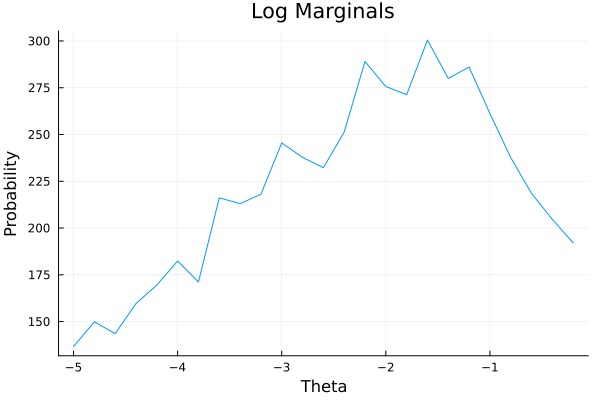

In [1]:
include("Julia_Implementation.jl")
using Random
using Distributions
using LinearAlgebra
using Statistics
using StatsFuns: logsumexp
using .Threads
using ProgressMeter
using SpecialFunctions
using Plots
using DataFrames
#Generating the noisy observations

# 参数初始化
beta_pcn = 1.0 # 预条件Crank-Nicolson算法的步长参数
n_iter = 300 # 迭代次数
theta0 = -1.0 # theta的初始猜测
beta0 = 5.0 # beta的初始猜测
C0 = 2.0 # C的初始猜测
num_particles = 3000

# 三个参数的步长
l_theta = 1.0
l_beta = 0.1
l_C = 2.0

# 真实参数值
true_theta = -1.0
kw = 1.0
kv = 0.001
true_sigmaw2 = 2.0
true_sigmaw = sqrt(true_sigmaw2)
true_muw = 5.0
sigma_n = true_sigmaw * sqrt(kv)

# 模拟参数
true_beta = 5.0
true_C = 10.0
T = 30.0
N = 10*round(Int,T) # 分辨率

# 定义Langevin动力学
A = zeros(2, 2)
A[1, 2] = 1.0
A[2, 2] = true_theta
h = [0.0 ; 1.0]
# 模拟
evaluation_points = range(0, T, length=N)
#print("Hi")

subordinator_jumps, jump_times = Julia_Implementation.vectorized_particle_Gamma_generator(true_beta, true_C, T, 1, 1, 1000)# subordinator jump sizes and times
SDE_samples = Julia_Implementation.generate_SDE_samples(subordinator_jumps[1,:],jump_times[1,:],true_muw,true_sigmaw,A,h,evaluation_points)
#print(size(samples))
Noisy_samples = SDE_samples[1, :] .+ randn(length(SDE_samples[1, :])) .* sigma_n


theta_values = collect(-5.0:0.2:-0.1)  # 可以根据需要调整这个范围
log_marginals = similar(theta_values)
alphaw_prior = 0.001
betaw_prior = 0.001
#Pre-heating
Julia_Implementation.Normal_Gamma_Langevin_MPF(Noisy_samples,N,T,2,true_theta,true_beta,true_C,kw,alphaw_prior,betaw_prior,kv)

for i in 1:length(theta_values)
    theta = theta_values[i]
    #Serious Run
    inferred_Xs, inferred_covs, sigmaw2_means, sigmaw2_uncertaintys, accumulated_Es, accumulated_Fs, accumulated_log_marginals = Julia_Implementation.Normal_Gamma_Langevin_MPF(Noisy_samples,N,T,num_particles,theta,true_beta,true_C,kw,alphaw_prior,betaw_prior,kv)
    log_marginal = logsumexp(accumulated_log_marginals) - log(num_particles)
    log_marginals[i] = log_marginal

end
p = plot(theta_values, log_marginals, title="Log Marginals", xlabel="Theta", ylabel="Probability", legend=false)
plot(p)


Progress: 100%|█████████████████████████████████████████| Time: 0:00:10
Progress: 100%|█████████████████████████████████████████| Time: 0:00:03
Progress: 100%|█████████████████████████████████████████| Time: 0:00:05
Progress: 100%|█████████████████████████████████████████| Time: 0:00:07
Progress: 100%|█████████████████████████████████████████| Time: 0:00:06
Progress: 100%|█████████████████████████████████████████| Time: 0:00:03
Progress: 100%|█████████████████████████████████████████| Time: 0:00:03
Progress: 100%|█████████████████████████████████████████| Time: 0:00:08
Progress: 100%|█████████████████████████████████████████| Time: 0:00:09
Progress: 100%|█████████████████████████████████████████| Time: 0:00:03
Progress: 100%|█████████████████████████████████████████| Time: 0:00:03
Progress: 100%|█████████████████████████████████████████| Time: 0:00:08
Progress: 100%|█████████████████████████████████████████| Time: 0:00:08
Progress: 100%|█████████████████████████████████████████| Time: 

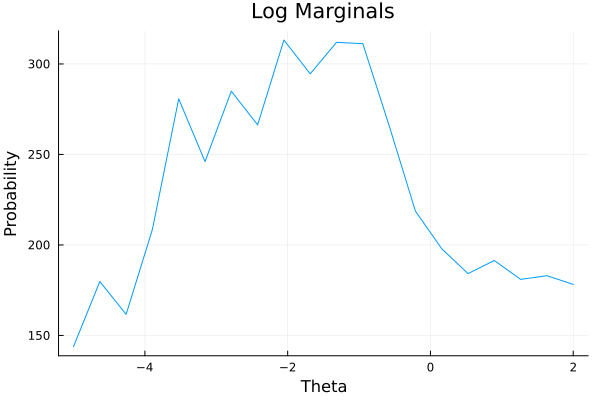

In [1]:
include("Julia_Implementation.jl")
using Random
using Distributions
using LinearAlgebra
using Statistics
using StatsFuns: logsumexp
using .Threads
using ProgressMeter
using SpecialFunctions
using Plots
using DataFrames
#Generating the noisy observations

# 参数初始化
beta_pcn = 1.0 # 预条件Crank-Nicolson算法的步长参数
n_iter = 300 # 迭代次数
theta0 = -1.0 # theta的初始猜测
beta0 = 5.0 # beta的初始猜测
C0 = 2.0 # C的初始猜测
num_particles = 3000

# 三个参数的步长
l_theta = 1.0
l_beta = 0.1
l_C = 2.0

# 真实参数值
true_theta = -1.0
kw = 1.0
kv = 0.001
true_sigmaw2 = 2.0
true_sigmaw = sqrt(true_sigmaw2)
true_muw = 5.0
sigma_n = true_sigmaw * sqrt(kv)

# 模拟参数
true_beta = 5.0
true_C = 10.0
T = 30.0
N = 10*round(Int,T) # 分辨率

# 定义Langevin动力学
A = zeros(2, 2)
A[1, 2] = 1.0
A[2, 2] = true_theta
h = [0.0 ; 1.0]
# 模拟
evaluation_points = range(0, T, length=N)
#print("Hi")

subordinator_jumps, jump_times = Julia_Implementation.vectorized_particle_Gamma_generator(true_beta, true_C, T, 1, 1, 1000)# subordinator jump sizes and times
SDE_samples = Julia_Implementation.generate_SDE_samples(subordinator_jumps[1,:],jump_times[1,:],true_muw,true_sigmaw,A,h,evaluation_points)
#print(size(samples))
Noisy_samples = SDE_samples[1, :] .+ randn(length(SDE_samples[1, :])) .* sigma_n


theta_values = LinRange(-5.0,2.0,20)  # 可以根据需要调整这个范围
log_marginals = similar(theta_values)
alphaw_prior = 0.001
betaw_prior = 0.001
#Pre-heating
Julia_Implementation.Normal_Gamma_Langevin_MPF(Noisy_samples,N,T,2,true_theta,true_beta,true_C,kw,alphaw_prior,betaw_prior,kv)

for i in 1:length(theta_values)
    theta = theta_values[i]
    #Serious Run
    inferred_Xs, inferred_covs, sigmaw2_means, sigmaw2_uncertaintys, accumulated_Es, accumulated_Fs, accumulated_log_marginals = Julia_Implementation.Normal_Gamma_Langevin_MPF(Noisy_samples,N,T,num_particles,theta,true_beta,true_C,kw,alphaw_prior,betaw_prior,kv)
    log_marginal = logsumexp(accumulated_log_marginals) - log(num_particles)
    log_marginals[i] = log_marginal

end
p = plot(theta_values, log_marginals, title="Log Marginals", xlabel="Theta", ylabel="Probability", legend=false)
plot(p)


### The results seem to be noisier than python. Hopefully this is because of the random generator.

In [4]:
using Pkg
Pkg.add("RandomNumbers")

   Resolving package versions...
    Updating `~/.julia/environments/v1.9/Project.toml`
  [e6cf234a] + RandomNumbers v1.5.3
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [1]:
using Random
using Distributions
#using RandomNumbers
#rng = MersenneTwister() 
rng = Xoshiro()
#rand(rng, Exponential(1), 100,100)

Xoshiro(0x031a0555f1bc4697, 0x963c80b625685ef6, 0x5c3f3101d95134f0, 0xb47f7d2deaf8fcd8)

Progress: 100%|█████████████████████████████████████████| Time: 6:57:27


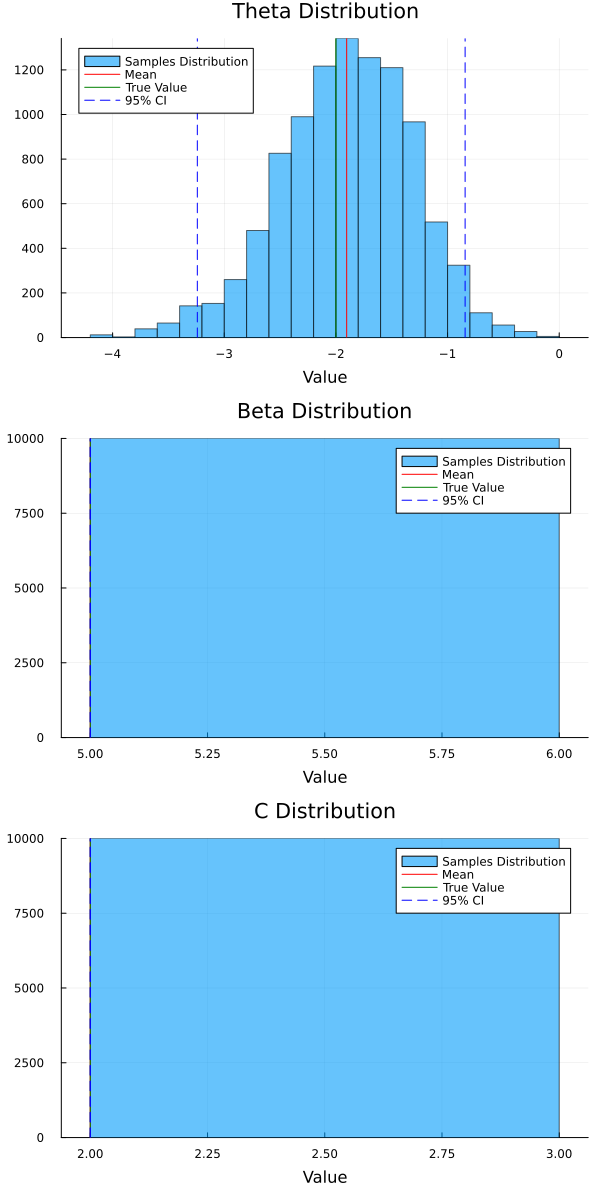

In [1]:

include("Julia_Implementation.jl")
using Random
using Distributions
using LinearAlgebra
using Statistics
using StatsFuns: logsumexp
using .Threads
using ProgressMeter
using SpecialFunctions
using Plots
using DataFrames
#Generating the noisy observations

# 参数初始化
num_iter = 10000 # 迭代次数
num_particles = 1000


# 三个参数的步长
l_theta = 0.2
l_beta = 0.0
l_C = 0.0
# 参数priors
theta0 = -1 # theta的初始猜测
beta0 = 5.0 # beta的初始猜测
C0 = 2.0 # C的初始猜测

# 真实参数值
true_theta = -2.0
true_beta = 5.0
true_C = 2.0


kw = 1.0
kv = 0.001
true_sigmaw2 = 0.2
true_sigmaw = sqrt(true_sigmaw2)
true_muw = 0.2
sigma_n = true_sigmaw * sqrt(kv)

# 模拟参数
T = 30.0
N = 5*round(Int,T) # resolution

# 定义Langevin动力学
A = zeros(2, 2)
A[1, 2] = 1.0
A[2, 2] = true_theta
h = [0.0 ; 1.0]
# 模拟
evaluation_points = range(0, T, length=N)
#print("Hi")

subordinator_jumps, jump_times = Julia_Implementation.vectorized_particle_Gamma_generator(true_beta, true_C, T, 1, 1, 10000)# subordinator jump sizes and times
SDE_samples = Julia_Implementation.generate_SDE_samples(subordinator_jumps[1,:],jump_times[1,:],true_muw,true_sigmaw,A,h,evaluation_points)
#print(size(samples))
Noisy_samples = SDE_samples[1, :] .+ randn(length(SDE_samples[1, :])) .* sigma_n




alphaw_prior = 2.1
betaw_prior = 1.0

# Pre-heating Run
Julia_Implementation.Normal_Gamma_Langevin_GRW_MCMC_double_update(Noisy_samples,N,T,10,10,kw ,alphaw_prior,betaw_prior,kv, theta0, beta0, C0, l_theta,l_beta,l_C)


#Serious Run
theta_samples, beta_samples, C_samples,acceptance_log_probabilities = Julia_Implementation.Normal_Gamma_Langevin_GRW_MCMC_double_update(Noisy_samples,N,T,num_particles,num_iter,kw ,alphaw_prior,betaw_prior,kv, theta0, beta0, C0, l_theta,l_beta,l_C,rejection_limit = 5)


p1 = Julia_Implementation.plot_samples_distribution(theta_samples, true_theta, "Theta Distribution")
p2 = Julia_Implementation.plot_samples_distribution(beta_samples, true_beta, "Beta Distribution")
p3 = Julia_Implementation.plot_samples_distribution(C_samples, true_C, "C Distribution")

# Combine the plots
plot(p1, p2, p3, layout=(3, 1), size=(600, 1200))


In [2]:
using Serialization
serialize("theta_samples_double_update_good.jls", theta_samples)

80008

Progress: 100%|█████████████████████████████████████████| Time: 3:16:28


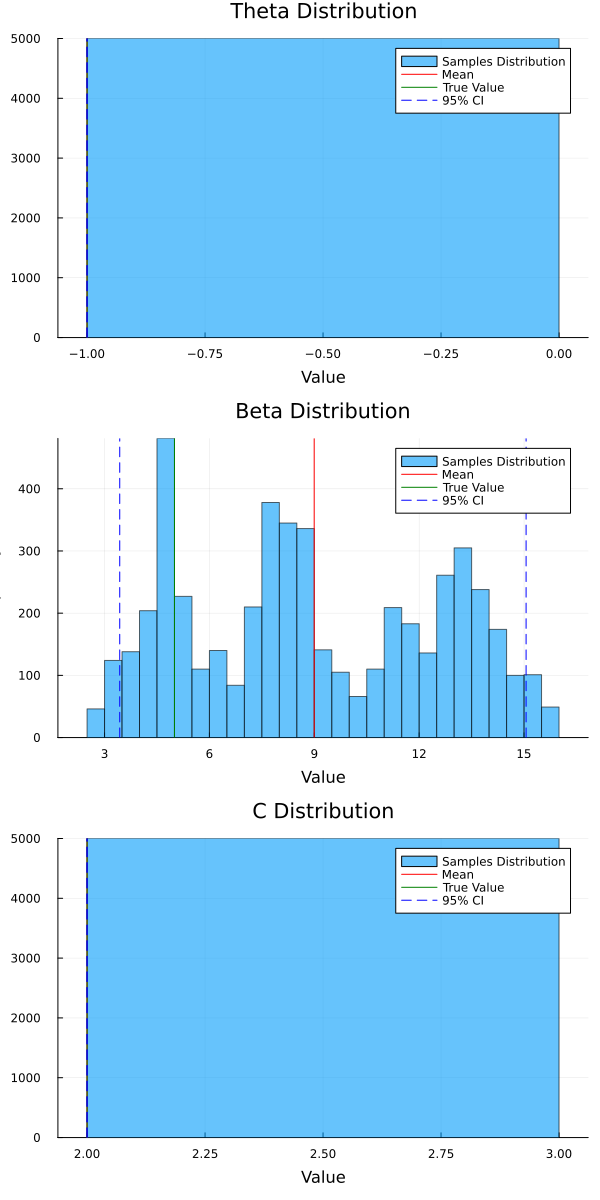

In [1]:

include("Julia_Implementation.jl")
using Random
using Distributions
using LinearAlgebra
using Statistics
using StatsFuns: logsumexp
using .Threads
using ProgressMeter
using SpecialFunctions
using Plots
using DataFrames
#Generating the noisy observations

# 参数初始化
num_iter = 5000 # 迭代次数
num_particles = 1000


# 三个参数的步长
l_theta = 0.0
l_beta = 0.1
l_C = 0.0
# 参数priors
theta0 = -1.0 # theta的初始猜测
beta0 = 3.0 # beta的初始猜测
C0 = 2.0 # C的初始猜测

# 真实参数值
true_theta = -1.0
true_beta = 5.0
true_C = 2.0


kw = 1.0
kv = 0.001
true_sigmaw2 = 0.2
true_sigmaw = sqrt(true_sigmaw2)
true_muw = 0.2
sigma_n = true_sigmaw * sqrt(kv)

# 模拟参数
T = 30.0
N = 5*round(Int,T) # resolution

# 定义Langevin动力学
A = zeros(2, 2)
A[1, 2] = 1.0
A[2, 2] = true_theta
h = [0.0 ; 1.0]
# 模拟
evaluation_points = range(0, T, length=N)
#print("Hi")

subordinator_jumps, jump_times = Julia_Implementation.vectorized_particle_Gamma_generator(true_beta, true_C, T, 1, 1, 10000)# subordinator jump sizes and times
SDE_samples = Julia_Implementation.generate_SDE_samples(subordinator_jumps[1,:],jump_times[1,:],true_muw,true_sigmaw,A,h,evaluation_points)
#print(size(samples))
Noisy_samples = SDE_samples[1, :] .+ randn(length(SDE_samples[1, :])) .* sigma_n




alphaw_prior = 2.1
betaw_prior = 1.0

# Pre-heating Run
Julia_Implementation.Normal_Gamma_Langevin_GRW_MCMC_double_update(Noisy_samples,N,T,10,10,kw ,alphaw_prior,betaw_prior,kv, theta0, beta0, C0, l_theta,l_beta,l_C)


#Serious Run
theta_samples, beta_samples, C_samples,acceptance_log_probabilities = Julia_Implementation.Normal_Gamma_Langevin_GRW_MCMC_double_update(Noisy_samples,N,T,num_particles,num_iter,kw ,alphaw_prior,betaw_prior,kv, theta0, beta0, C0, l_theta,l_beta,l_C,rejection_limit = 5)


p1 = Julia_Implementation.plot_samples_distribution(theta_samples, true_theta, "Theta Distribution")
p2 = Julia_Implementation.plot_samples_distribution(beta_samples, true_beta, "Beta Distribution")
p3 = Julia_Implementation.plot_samples_distribution(C_samples, true_C, "C Distribution")

# Combine the plots
plot(p1, p2, p3, layout=(3, 1), size=(600, 1200))


In [3]:

include("Julia_Implementation.jl")
using Random
using Distributions
using LinearAlgebra
using Statistics
using StatsFuns: logsumexp
using .Threads
using ProgressMeter
using SpecialFunctions
using Plots
using DataFrames
#Generating the noisy observations

# 参数初始化
num_iter = 5000 # 迭代次数
num_particles = 1000


# 三个参数的步长
l_theta = 0.0
l_beta = 1.0
l_C = 0.0
# 参数priors
theta0 = -1.0 # theta的初始猜测
beta0 = 3.0 # beta的初始猜测
C0 = 2.0 # C的初始猜测

# 真实参数值
true_theta = -1.0
true_beta = 5.0
true_C = 2.0


kw = 1.0
kv = 0.001
true_sigmaw2 = 0.2
true_sigmaw = sqrt(true_sigmaw2)
true_muw = 0.2
sigma_n = true_sigmaw * sqrt(kv)

# 模拟参数
T = 30.0
N = 5*round(Int,T) # resolution

# 定义Langevin动力学
A = zeros(2, 2)
A[1, 2] = 1.0
A[2, 2] = true_theta
h = [0.0 ; 1.0]
# 模拟
evaluation_points = range(0, T, length=N)
#print("Hi")

subordinator_jumps, jump_times = Julia_Implementation.vectorized_particle_Gamma_generator(true_beta, true_C, T, 1, 1, 10000)# subordinator jump sizes and times
SDE_samples = Julia_Implementation.generate_SDE_samples(subordinator_jumps[1,:],jump_times[1,:],true_muw,true_sigmaw,A,h,evaluation_points)
#print(size(samples))
Noisy_samples = SDE_samples[1, :] .+ randn(length(SDE_samples[1, :])) .* sigma_n




alphaw_prior = 2.1
betaw_prior = 1.0

# Pre-heating Run
Julia_Implementation.Normal_Gamma_Langevin_GRW_MCMC_double_update(Noisy_samples,N,T,10,10,kw ,alphaw_prior,betaw_prior,kv, theta0, beta0, C0, l_theta,l_beta,l_C)


#Serious Run
theta_samples, beta_samples, C_samples,acceptance_log_probabilities = Julia_Implementation.Normal_Gamma_Langevin_GRW_MCMC_double_update(Noisy_samples,N,T,num_particles,num_iter,kw ,alphaw_prior,betaw_prior,kv, theta0, beta0, C0, l_theta,l_beta,l_C,rejection_limit = 5)


p1 = Julia_Implementation.plot_samples_distribution(theta_samples, true_theta, "Theta Distribution")
p2 = Julia_Implementation.plot_samples_distribution(beta_samples, true_beta, "Beta Distribution")
p3 = Julia_Implementation.plot_samples_distribution(C_samples, true_C, "C Distribution")

# Combine the plots
plot(p1, p2, p3, layout=(3, 1), size=(600, 1200))


UndefVarError: UndefVarError: `beta_samples` not defined